# Secant method

The secant method is very similar to the bisection method except instead of dividing each interval, and the solution is also guaranteed by the [_**Intermediate Value Theorem**_](https://www.wikiwand.com/en/Intermediate_value_theorem).<br>

<img src='https://www.cs.rochester.edu/u/brown/160_10_27_11/lectures/root_finding/secant.jpg'>

## Formula

Let $a = x_0$ and $b = x_1$.
<br><br>
Let $f(x)$ be a continuous function on a closed interval $[a, b]$ such that $f(a)f(b) < 0$.
<br><br>
Consider two points $(a, f(a))$ and $(b, f(b))$. So the secant line connecting these two points is
    $$y_0 = \frac{f(b) - f(a)}{b - a}(x - a) + f(a).$$
Then the point cross $x$-axis is
    $$0 = \frac{f(b) - f(a)}{b - a}(x - a) + f(a);$$
therefore,
    $$x = a - f(a) \frac{b - a}{f(b) - f(a)} = a_{\text{next}}.$$
For convenience, we define
    $$\Delta x = - f(a) \frac{b - a}{f(b) - f(a)},$$
so
    $$x = a + \Delta x.$$

## Implement

### Part 0. Import necessary libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Implement the formula

In [17]:
def secant(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    interval: list
        The initial interval to search
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'
    
    ################################
    ### Answer the code here
    # Set the initial condition
    num_iterations = 0
    a_next, b_next = a, b
    ### End answer
    ################################
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'x_error': [], 'y_error': []}
    
    while True:
        ################################
        ### Answer the code here
        # Find the next point
        d_x = -func(a_next)*(b_next - a_next)/(func(b_next) - func(a_next))
        c = a_next + d_x
        ### End answer
        ################################
        
        # Evaluate the error
        x_error = abs(d_x)
        y_error = abs(func(c))

        if report_history:
            history['estimation'].append(c)
            history['x_error'].append(x_error)
            history['y_error'].append(y_error)

        # Satisfy the criterion and stop
        if x_error < tolerance or y_error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return c, history if report_history else c
        
        ################################
        ### Answer the code here
        # Check the number of iterations
        if num_iterations < max_iterations:
            
            num_iterations += 1
            
            # Find the next interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
        ### End answer
        ################################
            
            else:
                return c, history if report_history else c
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            return c, history if report_history else c


## Example

Let's using the same function in secant method 

$$f(x) = x^2 - x - 1 = 0$$

In [6]:
def f(x):
    return x**2 - x - 1


In [7]:
# Solution of f(x)
exact_solution = (1 + np.sqrt(5)) / 2
print(exact_solution)

1.618033988749895


## Test

In [18]:
my_initial_interval = [1.0, 2.0]                  # Maybe [1.0, 2.0] is a good choice

solution, history = secant(
    f, 
    my_initial_interval,
    max_iterations=100,
    tolerance=1e-7,
    report_history=True
)
print(solution)

Found solution after 8 iterations.
1.6180339631667067


## Error Analysis

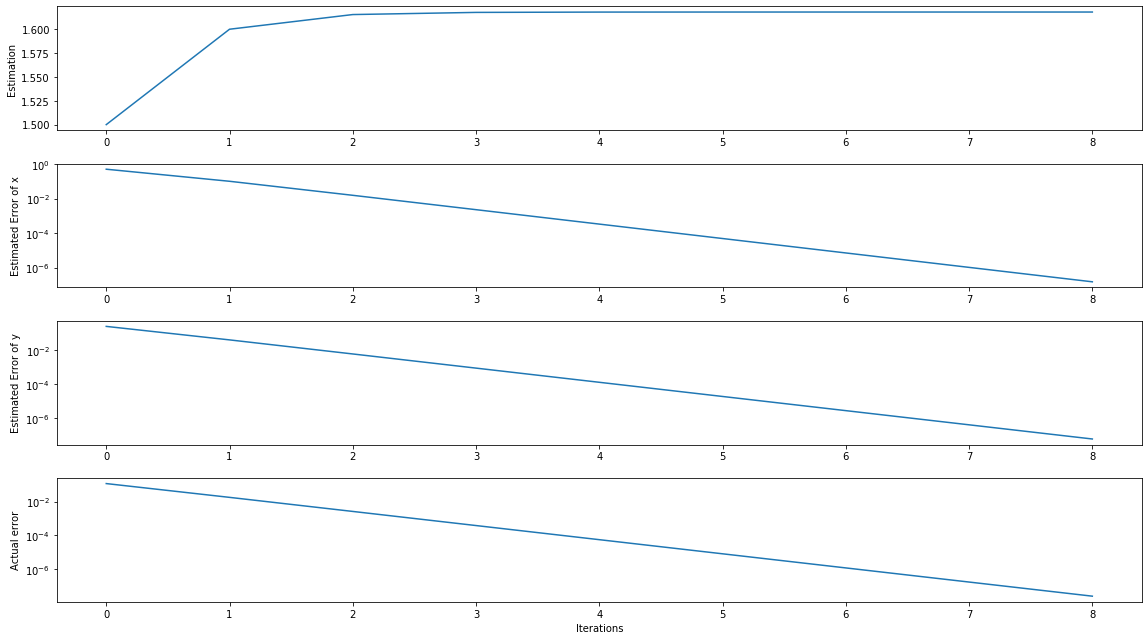

In [19]:
fig, axes = plt.subplots(4, 1, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error of x (log(error of x)) in history
ax2.plot(iterations, history['x_error'])
ax2.set_ylabel('Estimated Error of x')
ax2.set_yscale('log')

# Plot the estimation error of y (log(error of y)) in history
ax3.plot(iterations, history['y_error'])
ax3.set_ylabel('Estimated Error of y')
ax3.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax4.plot(iterations, actual_error)
ax4.set_ylabel('Actual error')
ax4.set_yscale('log')
ax4.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

## End